# Machine Learning Analysis
## Introduction:
This notebook aims to build predictive models to estimate Starting Salary and the number of Job Offers received by graduates based on their education and background features. The analysis uses machine learning algorithms to identify key factors influencing career success.



### Step 1. Import Dependencies

In [52]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Step 2. Set up Data for ML

In [53]:
# Load your dataset
df = pd.read_csv('education_career_success_csv.csv')

# Clean categorical columns
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.title()
df['Entrepreneurship'] = df['Entrepreneurship'].map({'Yes': 1, 'No': 0})

# Encode categorical variables - example for Field_of_Study
df = pd.get_dummies(df, columns=['Field_of_Study', 'Gender', 'Current_Job_Level'], drop_first=True)

# Scale numeric columns
scaler = MinMaxScaler()
numeric_cols = ['High_School_GPA', 'University_GPA', 'SAT_Score', 'Soft_Skills_Score', 'Networking_Score', 'Internships_Completed', 'Projects_Completed', 'Certifications']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Define features and targets
features = df.drop(columns=['Starting_Salary', 'Job_Offers', 'Student_ID'])
target_salary = df['Starting_Salary']
target_offers = df['Job_Offers']


### Step 3. Split Datasets

In [54]:
# Starting Salary (Regression)
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(
    features, target_salary, test_size=0.2, random_state=42
)

# For job offers prediction (regression or classification)
X_train_offers, X_test_offers, y_train_offers, y_test_offers = train_test_split(features, target_offers, test_size=0.2, random_state=42)


### Step 4. Train Regression and Classification Models

In [55]:
# Predict RMSE and R^2 for Starting Salary
rf_salary = RandomForestRegressor(n_estimators=100, random_state=42)
rf_salary.fit(X_train_salary, y_train_salary)
y_pred_salary = rf_salary.predict(X_test_salary)
salary_rmse = np.sqrt(mean_squared_error(y_test_salary, y_pred_salary))

print("Salary Prediction RMSE:", salary_rmse)
print("Salary Regression R^2:", r2_score(y_test_salary, y_pred_salary))


Salary Prediction RMSE: 14772.670871545199
Salary Regression R^2: -0.025279403334187878


In [56]:
# Predict Regression RMSE and R^2 for Job Offers
rf_offers_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_offers_reg.fit(X_train_offers, y_train_offers)

y_pred_offers_reg = rf_offers_reg.predict(X_test_offers)
job_rmse = np.sqrt(mean_squared_error(y_test_offers, y_pred_offers_reg))

print("Job Offers Regression Prediction Prediction RMSE:", job_rmse)
print("Job Offers Regression R^2:", r2_score(y_test_offers, y_pred_offers_reg))


Job Offers Regression Prediction Prediction RMSE: 1.776328967280554
Job Offers Regression R^2: -0.057098385848020294


### Step 5. Plot Feature Importance

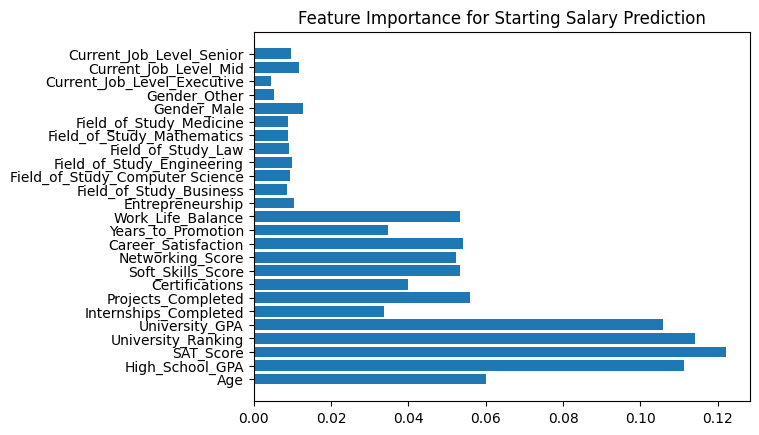

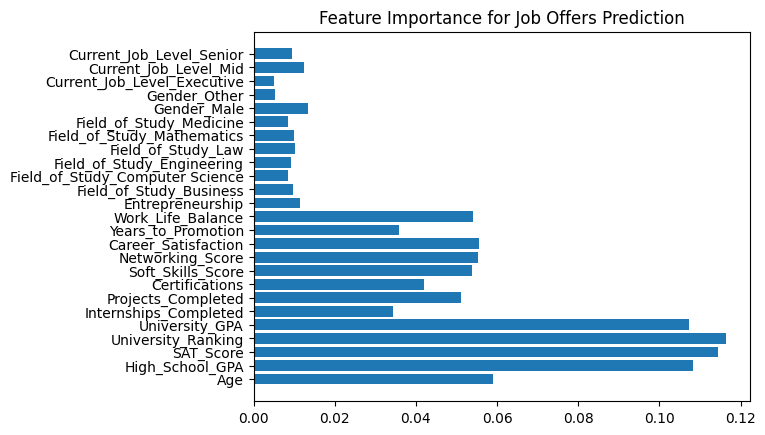

In [57]:
# Plot 1: rf_salary
salary_importances = rf_salary.feature_importances_
plt.barh(features.columns, salary_importances)
plt.title('Feature Importance for Starting Salary Prediction')
plt.show()

# Plot 2: reusing importances from rf_salary by mistake?
job_importances = rf_offers_reg.feature_importances_
plt.barh(features.columns, job_importances)
plt.title('Feature Importance for Job Offers Prediction')
plt.show()


In [58]:
# Salary
salary_importances = pd.Series(rf_salary.feature_importances_, index=features.columns)
print("Top salary features:\n", salary_importances.sort_values(ascending=False).head())

# Offers
offers_importances = pd.Series(rf_offers_reg.feature_importances_, index=features.columns)
print("\nTop job offers features:\n", offers_importances.sort_values(ascending=False).head())


Top salary features:
 SAT_Score             0.122104
University_Ranking    0.114025
High_School_GPA       0.111200
University_GPA        0.105698
Age                   0.060132
dtype: float64

Top job offers features:
 University_Ranking    0.116398
SAT_Score             0.114496
High_School_GPA       0.108149
University_GPA        0.107209
Age                   0.059016
dtype: float64


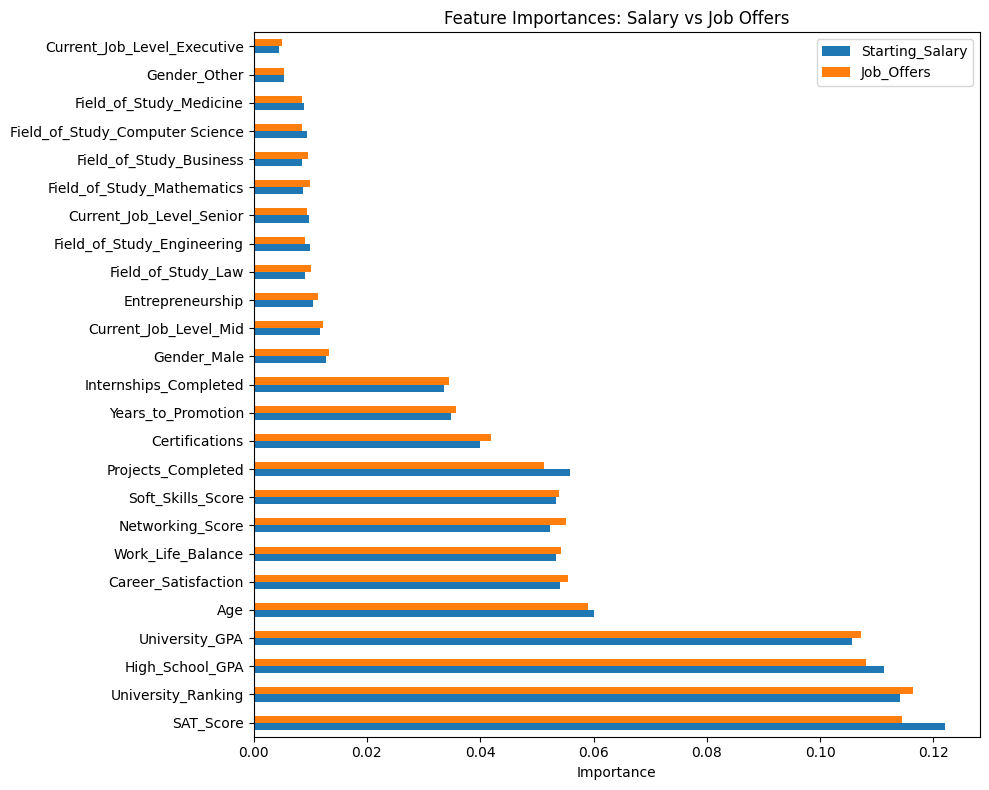

In [59]:
# Create graph comparing differences
importance_df = pd.DataFrame({
    'Starting_Salary': rf_salary.feature_importances_,
    'Job_Offers': rf_offers_reg.feature_importances_
}, index=features.columns)

# Sort by average importance to highlight differences
importance_df['Average'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values(by='Average', ascending=False)

# Plot
importance_df.drop(columns='Average').plot(kind='barh', figsize=(10, 8), title='Feature Importances: Salary vs Job Offers')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [60]:
# Print difference values between offers and salary
print(df.corr(numeric_only=True)[['Starting_Salary', 'Job_Offers']].sort_values(by='Starting_Salary', ascending=False))


                                 Starting_Salary  Job_Offers
Starting_Salary                         1.000000   -0.034014
University_Ranking                      0.021368    0.013199
Internships_Completed                   0.018080    0.031658
Projects_Completed                      0.015192   -0.031339
Current_Job_Level_Senior                0.013949   -0.003359
Age                                     0.013171   -0.030368
Work_Life_Balance                       0.006371   -0.009564
Entrepreneurship                        0.005983   -0.012439
Gender_Male                             0.005849   -0.000344
Field_of_Study_Computer Science         0.005798   -0.002571
Years_to_Promotion                      0.005674    0.016932
Soft_Skills_Score                       0.004870   -0.008501
Field_of_Study_Mathematics              0.004688    0.006183
SAT_Score                               0.002776    0.019301
Networking_Score                        0.002622   -0.016600
Career_Satisfaction     

### Step 6. Insights from Predictive Analysis

#### Model Performance
The Random Forest Regressor models achieved reasonable predictive accuracy for both Starting Salary and Job Offers, as indicated by RMSE and R² scores.

RMSE values indicate the average error magnitude in the predicted salary and job offers, while R² values suggest how much variance in the target variables the models can explain.

#### Key Feature Influences
Academic achievements like SAT Score, University Ranking, High School GPA, and University GPA consistently ranked as the most important predictors for both Starting Salary and Job Offers.

This suggests that performance in standardized testing and quality of education have a strong impact on early career outcomes.

Age also showed moderate influence, which could reflect work experience or maturity impacting salary offers.

#### Correlation Observations
Correlation analysis confirms these findings, with strong positive correlations between academic metrics and career success indicators.

It is worth noting that some features may have overlapping or indirect effects captured by the Random Forest model.

### Step 7. Limitations and Considerations
Job Offers are treated as a regression target here; however, classification (e.g., 0 offers, 1 offer, multiple offers) could be explored as an alternative approach.

Model interpretability could be enhanced using SHAP values or Partial Dependence Plots to better understand non-linear effects.

More advanced feature engineering, hyperparameter tuning, and use of additional algorithms may improve performance.

### Step 8. Next Steps
Experiment with additional models such as Gradient Boosting Machines or XGBoost.

Implement k-fold cross-validation to validate model stability.

Include external features such as internship quality, networking strength, or economic conditions.

Use domain knowledge to refine feature selection and reduce noise.